<a href="https://colab.research.google.com/github/KHUSHIM02/ANALYSIS-OF-MENTAL-HEALTH-CONDITIONS-SUCH-AS-DEPRESSION-ANXIETY-AND-STRESS/blob/main/autism_prediction_interactive_visuals_lazyclassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autism Prediction

A_Score Feature

A1_Score to A10_score is a Score based on Autism Spectrum Quotient (AQ)10 item screening tool. it's a binary value ( 0 or 1 )

In [8]:
%pip install ydata_profiling
%pip install seaborn
%pip install streamlit

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ydata_profiling as pp
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from collections import Counter
from sklearn import metrics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ad1781622fd8ef5d2b61bffd0f67812104450d5d9e53ab0c88df7de85c053fe9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
from google.colab import files

# Prompt user to upload a file
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving test.csv to test.csv
Saving train.csv to train.csv
Uploaded file: test.csv
Uploaded file: train.csv


In [10]:
df = pd.read_csv('train.csv')

print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score        age gender       ethnicity jaundice  \
0         0         1          1  38.172746      f               ?       no   
1         0         0          0  47.750517      m               ?       no   
2         1         1          1   7.380373      m  White-European       no   
3         0         0          0  23.561927      f               ?       no   
4         0         0          0  43.205790      m               ?       no   

  austim  contry_of_res used_app_before     result

In [11]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [12]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [13]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [14]:
df.shape

(800, 22)

In [15]:
df.size

17600

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

# ChecK Data Cleaning

In [17]:
df.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [18]:
df.dtypes

,0
ID,int64
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64


In [19]:
df.duplicated().sum()

0

to drop duplicated if there is --->
**df.drop_duplicates(inplace=True)**

In [20]:
df["ethnicity"].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [21]:
df["austim"].value_counts()

,count
austim,
no,669
yes,131


In [22]:
df["jaundice"].value_counts()

,count
jaundice,
no,615
yes,185


# EDA and Data Understanding by Amazing and Interactive Visuals

In [23]:
%pip install ipywidgets
ProfileReport(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7c46f7ce06a0>,
 [Text(0, 0, 'A1'),
  Text(1, 0, 'A2'),
  Text(2, 0, 'A3'),
  Text(3, 0, 'A4'),
  Text(4, 0, 'A5'),
  Text(5, 0, 'A6'),
  Text(6, 0, 'A7'),
  Text(7, 0, 'A8'),
  Text(8, 0, 'A9')])

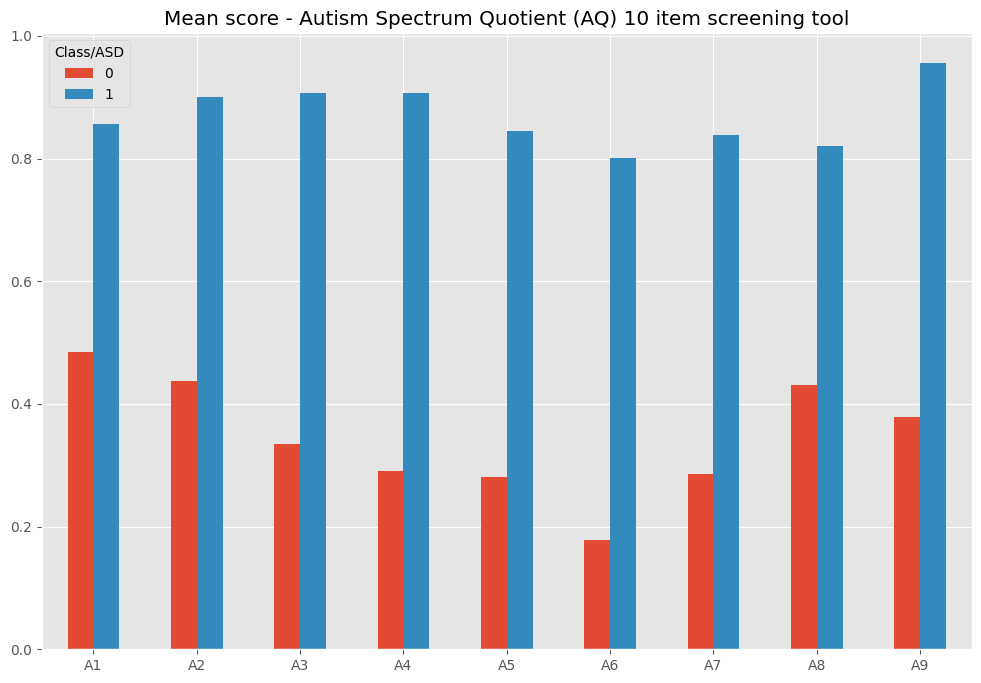

In [24]:
score_features = df.filter(regex='A[0-9]_', axis=1).columns.tolist()
#This line groups the train_data DataFrame by the 'Class/ASD' column and calculates the mean for the columns specified by score_features
df.groupby('Class/ASD')[score_features].mean().T.plot.bar()
plt.title('Mean score - Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xticks(ticks=range(len(score_features)), labels=[x.split('_')[0] for x in score_features], rotation=0)

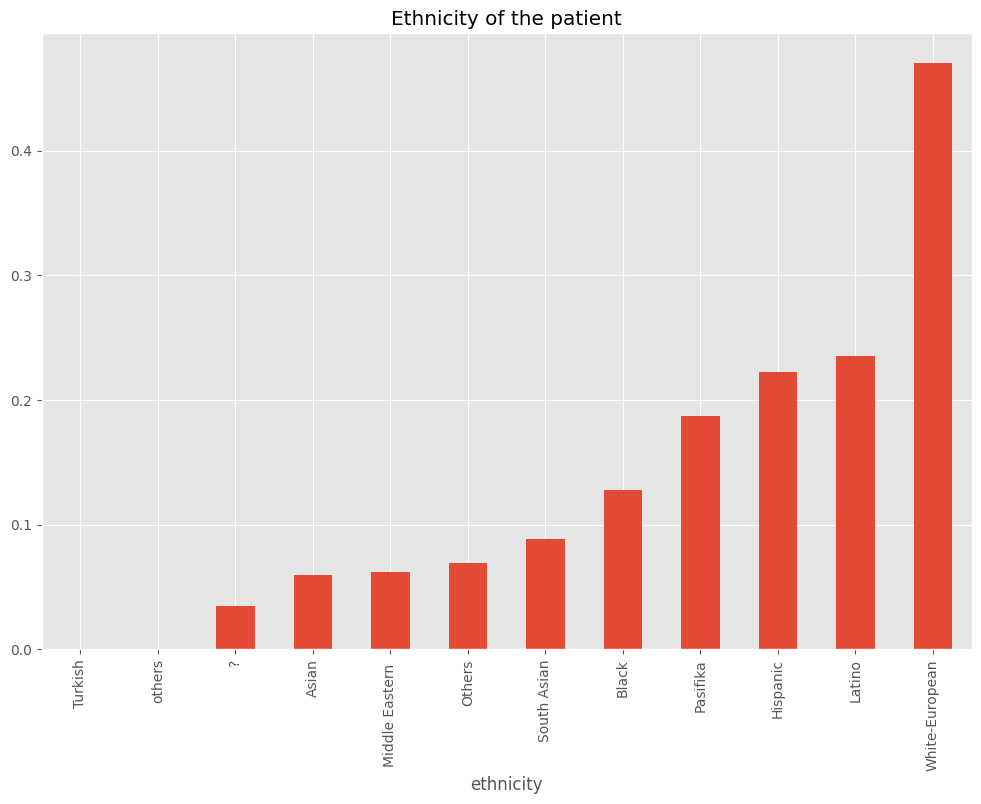

In [25]:
#Visualization of Ethnicity of the patient

df.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Ethnicity of the patient')
plt.xticks();

In [26]:
def convertAge(age):

    if age < 4:

        return 'Toddler'

    elif age < 12:

        return 'Kid'

    elif age < 18:

        return 'Teenager'

    elif age < 40:

        return 'Young'

    else:

        return 'Senior'


df['ageGroup'] = df['age'].apply(convertAge)

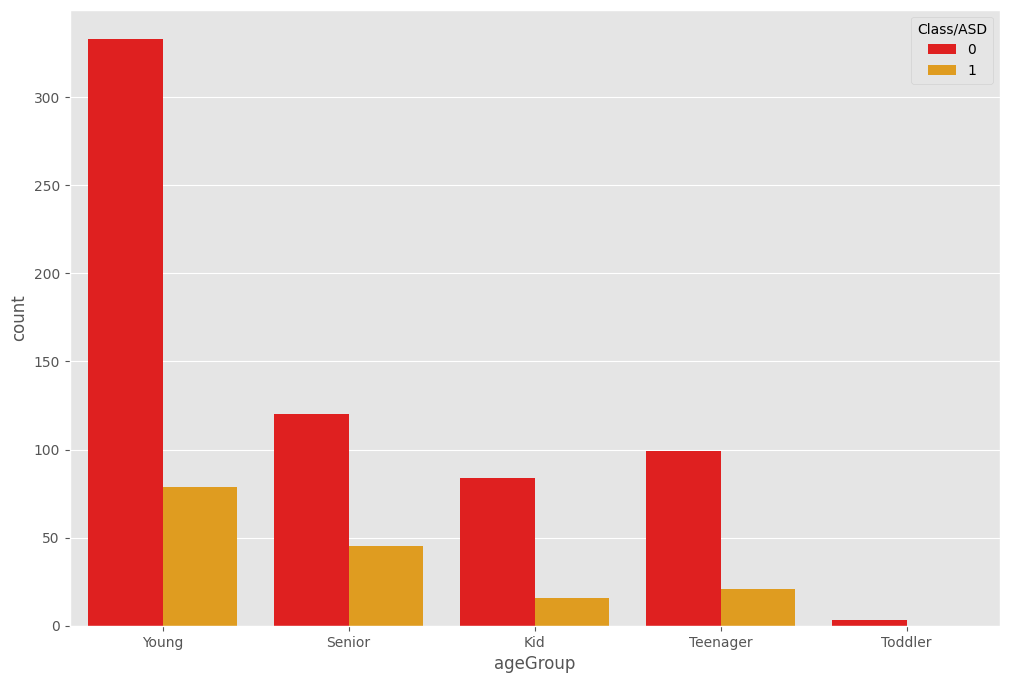

In [27]:
sns.countplot(x=df['ageGroup'], hue=df['Class/ASD'], palette=['red', 'orange'])  # Custom list of colors
plt.show()

In [28]:
ints = []
objects = []
floats = []

for col in df.columns:
 if df[col].dtype == int:
  ints.append(col)
 elif df[col].dtype == object:
  objects.append(col)
 else:
  floats.append(col)

In [29]:
ints.remove('ID')
ints.remove('Class/ASD')

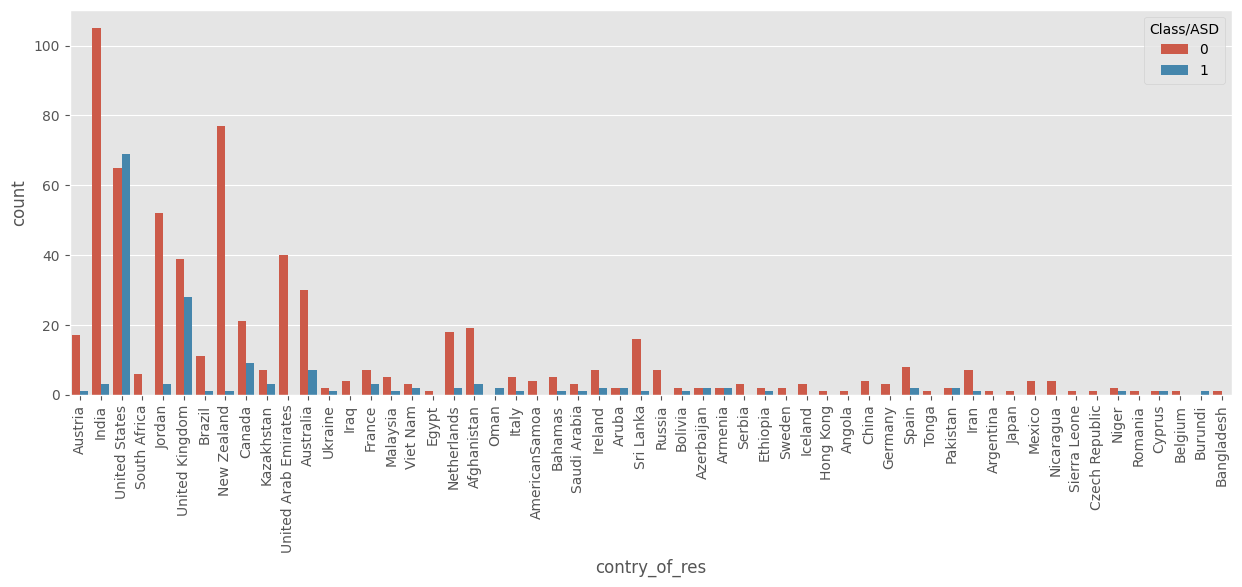

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In [31]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [32]:
%pip install nbformat
import plotly.express as px

# Assuming 'train_data' is your DataFrame
autism_colors = ['pink', 'purple']

# Grouping data to get counts
autism_counts = df['Class/ASD'].value_counts().reset_index()
autism_counts.columns = ['Class/ASD', 'Count']

# Plotting donut chart
fig = px.pie(autism_counts, names='Class/ASD', values='Count', hole=0.7, color_discrete_sequence=autism_colors,
             title='VISUALIZATION OF TOTAL AUTISM SPECTRUM DISORDER (ASD)')

fig.show()

In [33]:
#Visualization of country of residence of the patient - Treemap

fig = px.treemap(df, path=['contry_of_res','Class/ASD'], color='Class/ASD',
                 color_continuous_scale='plotly3',
)

fig.update_layout(title="<b> COUNTRY OF RESIDENCE OF THE PATIENT - TREEMAP <b>",
                  titlefont={'size': 20, 'family': "San Serif"},
                  height=500, width=1000,
                  template='simple_white',
                  autosize=False,
                  margin=dict(l=50,r=50,b=50, t=250,
                             ),
                 )
fig.update_layout(margin = dict(t=50, l=50, r=50, b=100))
fig.show()

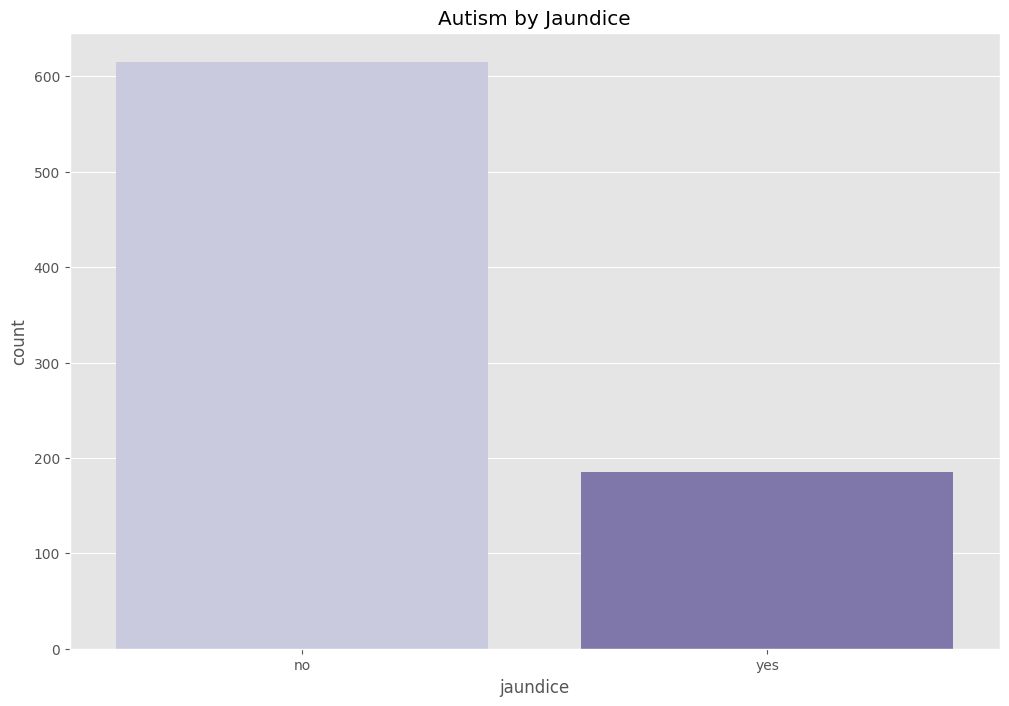

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.countplot(x="jaundice", data=df, palette="Purples")
plt.title('Autism by Jaundice')
plt.show()


# Modeling

In [35]:
features = [
    'gender',
 'ethnicity',
 'jaundice',
 'austim',
 'used_app_before',
 'age'
]

In [36]:
%pip install lazypredict

In [37]:
%pip install lazypredict
import lazypredict

In [38]:
from sklearn.model_selection import train_test_split

# Define the features
features = ['gender', 'ethnicity', 'jaundice', 'austim', 'age',  'used_app_before']

# Extract features and target variable
X = df[features]
y = df['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [39]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.

ros = RandomOverSampler(sampling_strategy='minority',random_state=0)

X, Y = ros.fit_resample(X_train,y_train)
X.shape, Y.shape

((1012, 6), (1012,))

In [40]:
# Check for any columns with string values
string_columns = df.select_dtypes(include=["object"]).columns
from sklearn.preprocessing import LabelEncoder

# Convert string columns to numeric values using LabelEncoder
le = LabelEncoder()
for col in string_columns:
    df[col] = le.fit_transform(df[col])

# Extract features and target variable
X = df[features]
y = df['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Balance the data using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,y_train)

# Normalize the features using RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Transform the validation



In [41]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame if it's different
data = df.copy()  # Create a copy of your DataFrame and assign it to 'data'

# Replace missing values ('?') with NaN and impute
data = data.replace('?', pd.NA)

# Check if there are any categorical columns before imputing
categorical_columns = data.select_dtypes(include=['object']).columns

# If there are categorical columns, proceed with imputation
if len(categorical_columns) > 0:
    data[categorical_columns] = data[categorical_columns].astype(str)
    # Check if mode is empty before imputing
    mode_values = data[categorical_columns].mode()
    if not mode_values.empty:
        data[categorical_columns] = data[categorical_columns].fillna(mode_values.iloc[0])
    else:
        print("Mode values are empty. Skipping imputation for categorical columns.")
else:
    print("No categorical columns found. Skipping imputation.")

No categorical columns found. Skipping imputation.


In [42]:
# Drop irrelevant columns and separate features/target
X = data.drop(columns=['ID', 'Class/ASD'], errors='ignore')
y = data['Class/ASD']

In [43]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=2,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  6%|▋         | 2/31 [00:00<00:05,  5.64it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8125, 'Balanced Accuracy': 0.6510721247563352, 'ROC AUC': 0.6510721247563354, 'F1 Score': 0.8095938576349024, 'Time taken': 0.2169959545135498}
{'Model': 'BaggingClassifier', 'Accuracy': 0.80625, 'Balanced Accuracy': 0.6768309663046504, 'ROC AUC': 0.6768309663046504, 'F1 Score': 0.8102436461877126, 'Time taken': 0.14575743675231934}
{'Model': 'BernoulliNB', 'Accuracy': 0.81875, 'Balanced Accuracy': 0.640072403230298, 'ROC AUC': 0.6400724032302979, 'F1 Score': 0.811174598990888, 'Time taken': 0.027535438537597656}


 26%|██▌       | 8/31 [00:00<00:01, 15.55it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.14871764183044434}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.75, 'Balanced Accuracy': 0.657755499860763, 'ROC AUC': 0.6577554998607631, 'F1 Score': 0.7687908496732027, 'Time taken': 0.03430533409118652}
{'Model': 'DummyClassifier', 'Accuracy': 0.83125, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.7546501706484642, 'Time taken': 0.028516769409179688}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.775, 'Balanced Accuracy': 0.6432748538011696, 'ROC AUC': 0.6432748538011696, 'F1 Score': 0.7836538461538461, 'Time taken': 0.027524232864379883}


 39%|███▊      | 12/31 [00:01<00:01,  9.98it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.76875, 'Balanced Accuracy': 0.5952380952380952, 'ROC AUC': 0.5952380952380952, 'F1 Score': 0.7704159519725557, 'Time taken': 0.4409453868865967}
{'Model': 'GaussianNB', 'Accuracy': 0.7875, 'Balanced Accuracy': 0.6360345307713728, 'ROC AUC': 0.6360345307713728, 'F1 Score': 0.7904897186147186, 'Time taken': 0.051667213439941406}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8, 'Balanced Accuracy': 0.6435533277638541, 'ROC AUC': 0.6435533277638541, 'F1 Score': 0.8, 'Time taken': 0.07520270347595215}


 45%|████▌     | 14/31 [00:01<00:01,  9.90it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.775, 'Balanced Accuracy': 0.5842383737120579, 'ROC AUC': 0.5842383737120579, 'F1 Score': 0.7715126291618828, 'Time taken': 0.08063864707946777}
{'Model': 'LabelSpreading', 'Accuracy': 0.78125, 'Balanced Accuracy': 0.5879977722082985, 'ROC AUC': 0.5879977722082985, 'F1 Score': 0.7760359720096217, 'Time taken': 0.10524630546569824}


 61%|██████▏   | 19/31 [00:01<00:00, 14.64it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.81875, 'Balanced Accuracy': 0.640072403230298, 'ROC AUC': 0.6400724032302979, 'F1 Score': 0.811174598990888, 'Time taken': 0.07994842529296875}
{'Model': 'LinearSVC', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.028502941131591797}
{'Model': 'LogisticRegression', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.034517765045166016}
{'Model': 'NearestCentroid', 'Accuracy': 0.75625, 'Balanced Accuracy': 0.7353104984683931, 'ROC AUC': 0.7353104984683932, 'F1 Score': 0.7811187269520603, 'Time taken': 0.02921605110168457}


 68%|██████▊   | 21/31 [00:01<00:00, 14.86it/s]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.83125, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.7546501706484642, 'Time taken': 0.065032958984375}
{'Model': 'Perceptron', 'Accuracy': 0.8, 'Balanced Accuracy': 0.6140350877192983, 'ROC AUC': 0.6140350877192982, 'F1 Score': 0.7934814814814815, 'Time taken': 0.0560455322265625}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8, 'Balanced Accuracy': 0.6435533277638541, 'ROC AUC': 0.6435533277638541, 'F1 Score': 0.8, 'Time taken': 0.057866573333740234}


 84%|████████▍ | 26/31 [00:02<00:00, 11.15it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.78125, 'Balanced Accuracy': 0.6322751322751322, 'ROC AUC': 0.6322751322751323, 'F1 Score': 0.7857589553732238, 'Time taken': 0.42664122581481934}
{'Model': 'RidgeClassifier', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.03502702713012695}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.05691099166870117}
{'Model': 'SGDClassifier', 'Accuracy': 0.80625, 'Balanced Accuracy': 0.588276246170983, 'ROC AUC': 0.5882762461709831, 'F1 Score': 0.7900454545454546, 'Time taken': 0.029699325561523438}
{'Model': 'SVC', 'Accuracy': 0.81875, 'Balanced Accuracy': 0.62531328320802, 'ROC AUC': 0.62531328320802, 'F1 Score': 0.8075763775231861, 'Time taken': 0.05324435234069824}


 97%|█████████▋| 30/31 [00:04<00:00,  4.00it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.80625, 'Balanced Accuracy': 0.6915900863269284, 'ROC AUC': 0.6915900863269284, 'F1 Score': 0.8126039028508345, 'Time taken': 1.8401734828948975}
[LightGBM] [Info] Number of positive: 134, number of negative: 506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.209375 -> initscore=-1.328697
[LightGBM] [Info] Start training from score -1.328697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

100%|██████████| 31/31 [00:04<00:00,  6.77it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.78125, 'Balanced Accuracy': 0.6322751322751322, 'ROC AUC': 0.6322751322751323, 'F1 Score': 0.7857589553732238, 'Time taken': 0.21609282493591309}


In [44]:
models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.76,0.74,0.74,0.78,0.03
XGBClassifier,0.81,0.69,0.69,0.81,1.84
BaggingClassifier,0.81,0.68,0.68,0.81,0.15
DecisionTreeClassifier,0.75,0.66,0.66,0.77,0.03
AdaBoostClassifier,0.81,0.65,0.65,0.81,0.22
QuadraticDiscriminantAnalysis,0.80,0.64,0.64,0.80,0.06
KNeighborsClassifier,0.80,0.64,0.64,0.80,0.08
ExtraTreeClassifier,0.78,0.64,0.64,0.78,0.03
LinearDiscriminantAnalysis,0.82,0.64,0.64,0.81,0.08


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
)
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('train.csv')

# Encode categorical features
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target variable
X = data.drop(columns=['Class/ASD'])
y = data['Class/ASD']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# Initialize LazyClassifier
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)

# Train all classifiers and predict
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train_sm, y_test)

# Create a function to calculate additional metrics
def calculate_metrics(y_true, y_pred, y_proba=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted'),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }
    # Add ROC AUC if probabilities are available
    if y_proba is not None:
        try:
            metrics["ROC AUC"] = roc_auc_score(y_true, y_proba)
        except ValueError:  # Handle cases where AUC cannot be computed
            metrics["ROC AUC"] = None
    else:
        metrics["ROC AUC"] = None

    return metrics

# Collect detailed metrics for each model
results = []
for model_name, model_instance in clf.models.items():
    print(f"Evaluating model: {model_name}")
    y_pred = model_instance.predict(X_test_scaled)
    y_proba = model_instance.predict_proba(X_test_scaled)[:, 1] if hasattr(model_instance, "predict_proba") else None

    metrics = calculate_metrics(y_test, y_pred, y_proba)
    metrics["Model"] = model_name  # Add model name
    results.append(metrics)

# Convert results to a DataFrame for easy viewing
detailed_metrics_df = pd.DataFrame(results)

# Save the detailed metrics to CSV
detailed_metrics_df.to_csv("detailed_lazy_metrics.csv", index=False)

# Display the top-performing models
print("\nTop Performing Models (LazyClassifier Overview):")
print(models.head())

# Display the detailed metrics
print("\nDetailed Metrics for All Models:")
print(detailed_metrics_df)


100%|██████████| 31/31 [00:06<00:00,  5.00it/s]


[LightGBM] [Info] Number of positive: 511, number of negative: 511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Evaluating model: AdaBoostClassifier
Evaluating model: BaggingClassifier
Evaluating model: BernoulliNB
Evaluating model: CalibratedClassifierCV
Evaluating model: DecisionTreeClassifier
Evaluating model: DummyClassifier
Evaluating model: ExtraTreeClassifier
Evaluating model: ExtraTreesClassifier
Evaluating model: GaussianNB
Evaluating model: KNeighbors

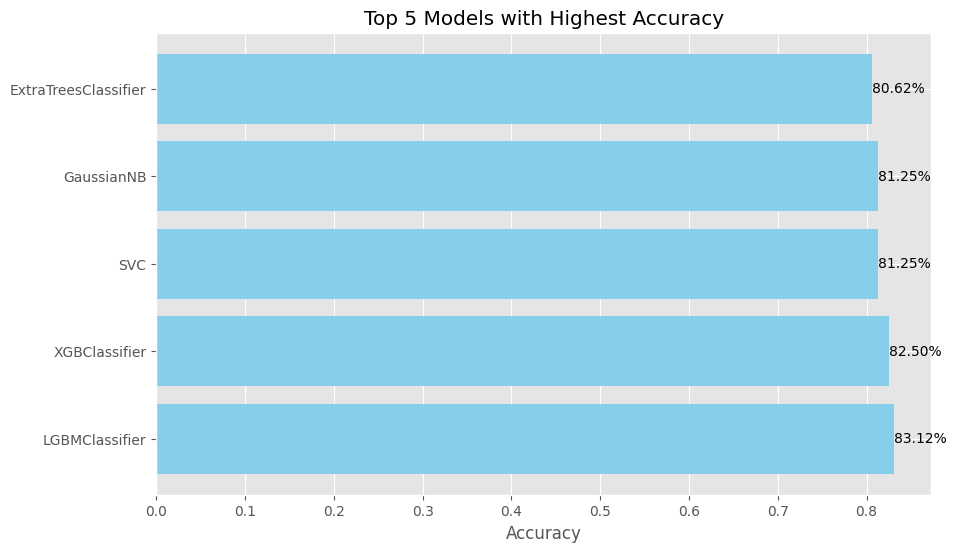

In [46]:
# Sort the models by accuracy in descending order (highest first)
top_models = models.sort_values(by='Accuracy', ascending=False).head(5)

# Plot the top 5 models and their accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(top_models.index, top_models['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Top 5 Models with Highest Accuracy')

# Display percentages on top of the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%}',
             va='center', color='black', fontsize=10)

plt.show()

In [47]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import roc_auc_score
import pickle


# Assuming X_train and X_test represent your input data, and y_train and y_test represent your labels
X_train = np.random.rand(1012, 5)  # Example input data
y_train = np.random.randint(0, 2, size=(1012,))  # Example labels
X_test = np.random.rand(1012, 5)  # Example input data
y_test = np.random.randint(0, 2, size=(1012,))  # Example labels

# Reshape input data to represent a single-channel "image"
X_train_reshaped = X_train.reshape((-1, 5, 1))
X_test_reshaped = X_test.reshape((-1, 5, 1))

# Define the CNN models
models = [
    Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(5, 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(2, activation='softmax')  # Change the number of units to match the number of classes
    ]),
    # Add more CNN models here as needed
]

# Create an empty list to store results
results = []

# Loop through each CNN model
for model in models:
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for integer labels
                  metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=0)

    # Calculate training and validation accuracy
    train_accuracy = roc_auc_score(y_train, model.predict(X_train_reshaped)[:, 1])  # Use the predicted probabilities for the positive class
    val_accuracy = roc_auc_score(y_test, model.predict(X_test_reshaped)[:, 1])  # Use the predicted probabilities for the positive class

    model.save("model.h5")

    # Append results to the list
    results.append([str(model), train_accuracy, val_accuracy])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Model', 'Training AUC', 'Validation AUC'])

# Sort the DataFrame by 'Validation AUC' column in descending order
results_df = results_df.sort_values(by='Validation AUC', ascending=False)

# Reset index to maintain the order
results_df = results_df.reset_index(drop=True)

# Display the DataFrame
print(results_df)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


                                      Model  Training AUC  Validation AUC
0  <Sequential name=sequential, built=True>          0.54            0.52


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef, confusion_matrix
)

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Add a channel dimension
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predict on test data
y_proba_cnn = cnn_model.predict(X_test_cnn).flatten()  # Probabilities
y_pred_cnn = (y_proba_cnn > 0.5).astype(int)  # Binary predictions

# Evaluate performance on the specified metrics
cnn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_cnn),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_cnn),
    "Precision": precision_score(y_test, y_pred_cnn),
    "Recall": recall_score(y_test, y_pred_cnn),
    "F1 Score": f1_score(y_test, y_pred_cnn),
    "MCC": matthews_corrcoef(y_test, y_pred_cnn),
}

# Display CNN metrics
print("\nCNN Metrics:")
for metric, value in cnn_metrics.items():
    print(f"{metric}: {value:.4f}")

# Display confusion matrix for further insights
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
print("\nConfusion Matrix:\n", conf_matrix)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5068 - loss: 0.8640 - val_accuracy: 0.5172 - val_loss: 0.6935
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5263 - loss: 0.8015 - val_accuracy: 0.5172 - val_loss: 0.6938
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4864 - loss: 0.7656 - val_accuracy: 0.5172 - val_loss: 0.6939
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4840 - loss: 0.7778 - val_accuracy: 0.5172 - val_loss: 0.6942
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5005 - loss: 0.7592 - val_accuracy: 0.5172 - val_loss: 0.6938
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5424 - loss: 0.7126 - val_accuracy: 0.5172 - val_loss: 0.6945
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4991 - loss: 0.7392 - val_accuracy: 0.5172 - val_loss: 0.6934
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5265 - loss: 0.7336 - val_accuracy: 0.5172 - va

In [49]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
# Import necessary classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Make sure you have XGBoost installed: !pip install xgboost



# Separate features and target variable
# Assuming 'Class/ASD' is your target column
X = data.drop(columns=['Class/ASD'])  # Create the feature matrix X
y = data['Class/ASD']  # Create the target variable y

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred, y_proba=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }
    if y_proba is not None:
        metrics["ROC AUC"] = roc_auc_score(y_true, y_proba)
    else:
        metrics["ROC AUC"] = None
    return metrics

# Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
rf_metrics = calculate_metrics(y_test, y_pred_rf, y_proba_rf)

# Model 2: XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
xgb_metrics = calculate_metrics(y_test, y_pred_xgb, y_proba_xgb)

# Compare models
print("Random Forest Metrics:")
print(rf_metrics)
print("\nXGBoost Metrics:")
print(xgb_metrics)

# Hyperparameter Tuning for the best model (Example: XGBoost)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5),
    verbose=1
)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

Random Forest Metrics:
{'Accuracy': 0.90234375, 'Balanced Accuracy': 0.90234375, 'Precision': 0.8503401360544217, 'Recall': 0.9765625, 'F1 Score': 0.9090909090909091, 'MCC': 0.8137018593108728, 'ROC AUC': 0.966522216796875}

XGBoost Metrics:
{'Accuracy': 0.90234375, 'Balanced Accuracy': 0.90234375, 'Precision': 0.8601398601398601, 'Recall': 0.9609375, 'F1 Score': 0.9077490774907749, 'MCC': 0.8102704191276968, 'ROC AUC': 0.96636962890625}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
